<a href="https://colab.research.google.com/github/YugankDabas/Crop_Price_Prediction/blob/main/crop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

In [3]:
#importing the dataset
dataset = pd.read_csv('/content/crop_price_encoded.csv')

In [4]:
dataset.head(5)

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),State Name_Haryana,State Name_Punjab,State Name_Uttar Pradesh,State Name_Uttrakhand,District Name_Amritsar,District Name_Gurgaon,District Name_Haridwar,...,Variety_Desi,Variety_Hybrid,Variety_Local,Variety_Other,Variety_Potato,Variety_Tomato,Crop_Potato,Crop_Tomato,Crop_Wheat,Modal Price (Rs./Quintal)
0,6,3200,4200,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,3600
1,7,700,1000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,800
2,7,800,1000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,900
3,7,2000,2800,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,2400
4,8,600,800,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,700


In [5]:
#Data Preprocessing
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

In [6]:
print(x)
print(y)

[[   6 3200 4200 ...    0    1    0]
 [   7  700 1000 ...    0    1    0]
 [   7  800 1000 ...    0    1    0]
 ...
 [  23 2290 2340 ...    0    0    1]
 [  25 2290 2315 ...    0    0    1]
 [  32 2340 2410 ...    0    0    1]]
[3600  800  900 ... 2305 2300 2370]


In [7]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [9]:
#build the ANN
ann = tf.keras.models.Sequential()

In [10]:
# layer-1
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [11]:
#layer-2
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [12]:
# layer-3
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [13]:
# layer-4
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [14]:
# output-layer
ann.add(tf.keras.layers.Dense(units=1))

In [15]:
# compile
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
print(ann.summary)

<bound method Model.summary of <Sequential name=sequential, built=False>>


In [16]:
# train
history = ann.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1000,
    batch_size=32,
    verbose=1
)

Epoch 1/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3842265.0000 - mae: 1733.9023 - val_loss: 347680.5938 - val_mae: 459.9272
Epoch 2/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 227413.9688 - mae: 373.6531 - val_loss: 60882.4023 - val_mae: 191.5079
Epoch 3/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45599.5000 - mae: 164.1051 - val_loss: 26629.1445 - val_mae: 113.4229
Epoch 4/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22164.7188 - mae: 105.6417 - val_loss: 20911.5898 - val_mae: 99.1672
Epoch 5/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 19253.1758 - mae: 93.2426 - val_loss: 17332.6016 - val_mae: 86.6568
Epoch 6/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16678.9277 - mae: 85.5254 - val_loss: 15395.3730 - val_mae: 77.2334
Epoch 7/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14726.8818 - mae: 78.3288 - val_loss: 13216.5605 - val_mae: 70.6206
Epoch 8/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11089.7598 - mae

In [17]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[2004.22 2000.  ]
 [2329.17 2350.  ]
 [ 864.91  800.  ]
 ...
 [1719.04 1800.  ]
 [1095.17 1080.  ]
 [ 728.4   700.  ]]


In [18]:
#Evaluate the model
loss, mae = ann.evaluate(x_test, y_test)
print(f"\n📉 Test Loss (MSE): {loss:.2f}")
print(f"📈 Test MAE: {mae:.2f}")

#Save the model
ann.save("crop_price_ann_model.h5")
print("✅ Model saved as 'crop_price_ann_model.h5'")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4062.9988 - mae: 32.8743



📉 Test Loss (MSE): 3961.74
📈 Test MAE: 32.42
✅ Model saved as 'crop_price_ann_model.h5'


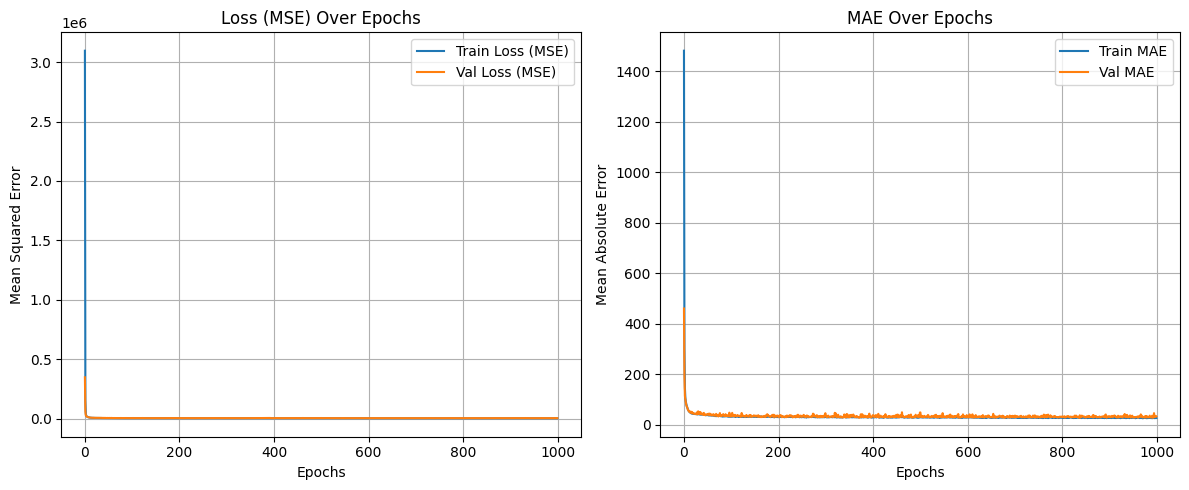

In [19]:
#Plot Loss and MAE over Epochs
plt.figure(figsize=(12, 5))

#Plot MSE Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

#Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()